In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt 

In [3]:
env = gym.make('FrozenLake-v1', is_slippery=True, render_mode='rgb_array')
obs, info = env.reset()
print('initial observation (state):  ', obs)
print('additional info: ', info)

initial observation (state):   0
additional info:  {'prob': 1}


In [4]:
#there are 16 cells in total, so the space is 16. this is one dim 
print('observation space: ', env.observation_space)
#4 actions 
print('action space: ', env.action_space)

observation space:  Discrete(16)
action space:  Discrete(4)


In [5]:
print('previous observation: ', obs)
#take a single random step 
#we use action space object that has a method sample 
action = env.action_space.sample() #choose a random action 
#step method iterates the environment for one step. we get a lot of the stuff back : new obs, reward 
#done 
obs, reward, done, truncated, info = env.step(action)
frame = env.render()

print('action taken: ', action)
print('new observation: ', obs) #observation (observable state)
print('reward received: ', reward) #immediate reward from the previous action
print('episode done? ', done) #boolean showing if the game is done 
print('episode truncated? ', truncated)
print('info: ', info)

previous observation:  0
action taken:  2
new observation:  1
reward received:  0.0
episode done?  False
episode truncated?  False
info:  {'prob': 0.3333333333333333}


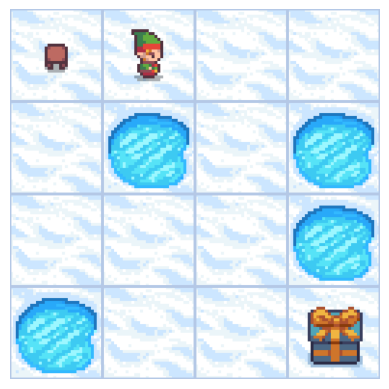

(256, 256, 3)

In [7]:
plt.imshow(frame)
#having no axis so that we focus on important stuff 
plt.axis('off')
plt.show()
frame.shape

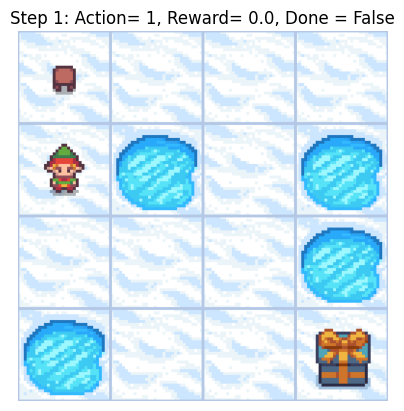

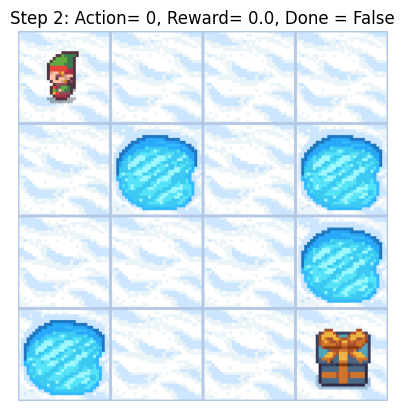

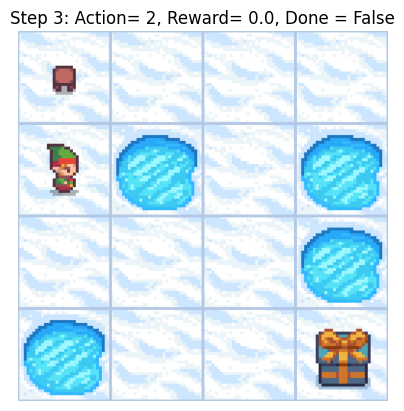

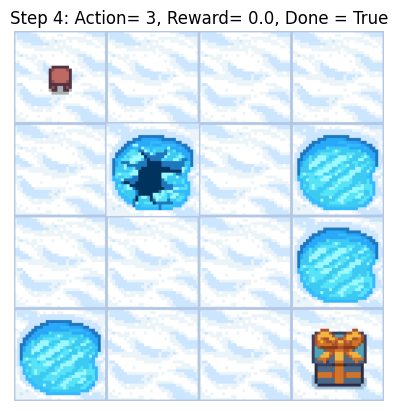

 Episode ended.


In [46]:
#performing 5 steps to see how it's going
obs, info = env.reset()
for i in range(5): #5 steps
    action = env.action_space.sample() 
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    plt.imshow(frame)
    plt.title(f'Step {i+1}: Action= {action}, Reward= {reward}, Done = {done}')
    plt.axis('off')
    plt.show()
    #truncated is like when we move too far from the ziel and there is no use of going further 
    if done or truncated:
        print(' Episode ended.')
        break
    

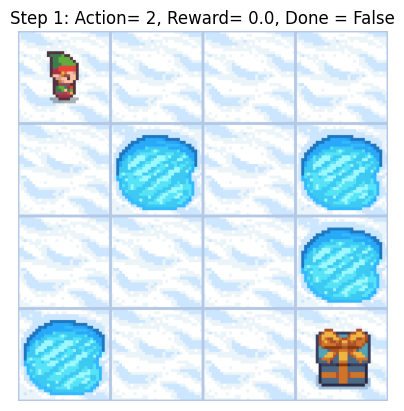

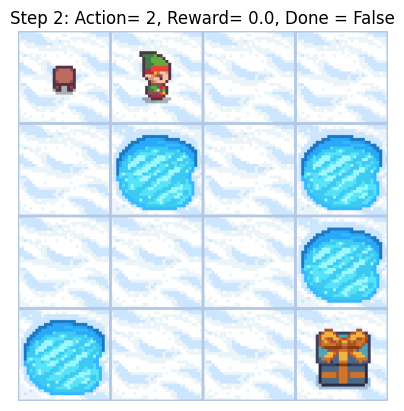

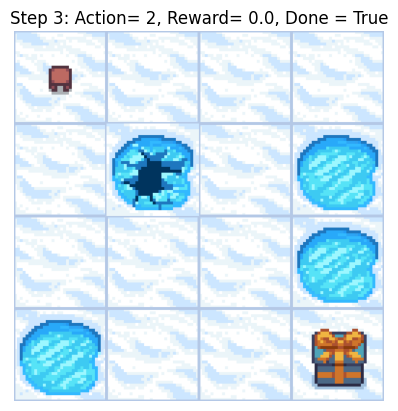

 Episode ended.


In [48]:
#always go to the right to see how it's going
obs, info = env.reset()
for i in range(5):
    action = 2
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    plt.imshow(frame)
    plt.title(f'Step {i+1}: Action= {action}, Reward= {reward}, Done = {done}')
    plt.axis('off')
    plt.show()
    #truncated is like when we move too far from the ziel and there is no use of going further 
    if done or truncated:
        print(' Episode ended.')
        break
    

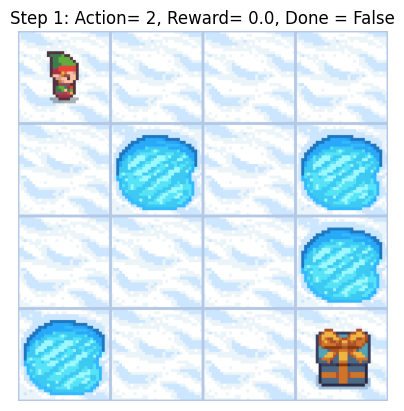

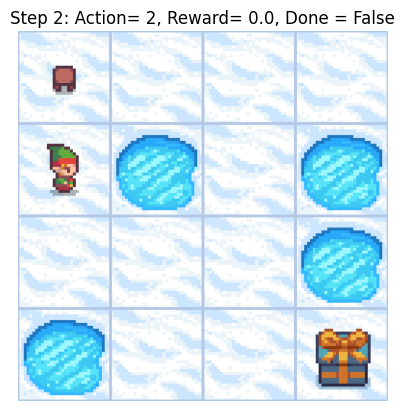

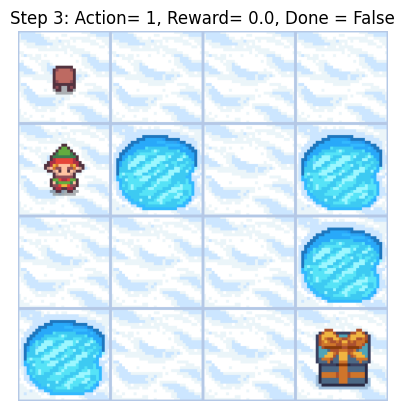

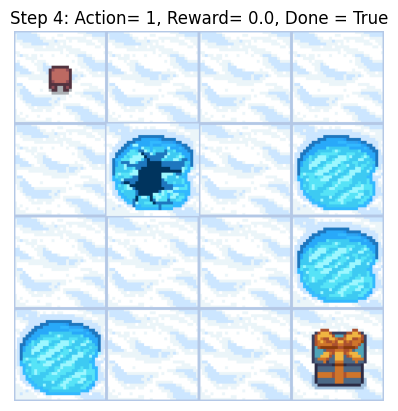

Episode ended.


In [56]:
#giving the sequence of steps to get to the goal

obs, info = env.reset()
def action_step(action: int, step_num: int):
    action = action
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    plt.imshow(frame)
    plt.title(f'Step {i+1}: Action= {action}, Reward= {reward}, Done = {done}')
    plt.axis('off')
    plt.show()
    #truncated is like when we move too far from the ziel and there is no use of going further 
    return done or truncated


actions = [2, 2, 1, 1, 1, 2]
for i, action in enumerate(actions):
    if action_step(action, i):
        print('Episode ended.')
        break






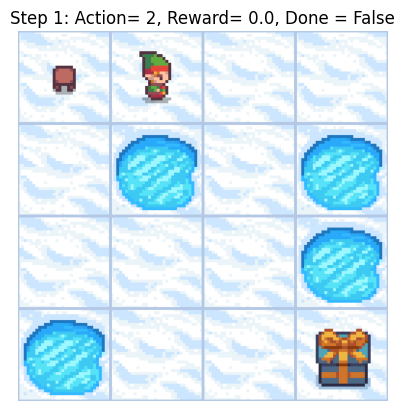

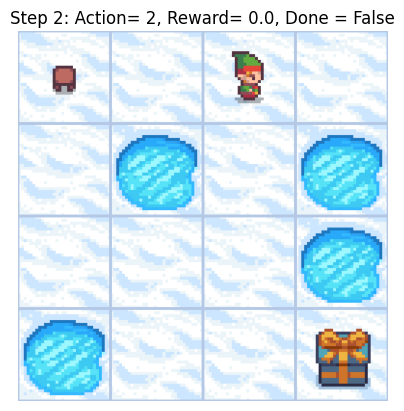

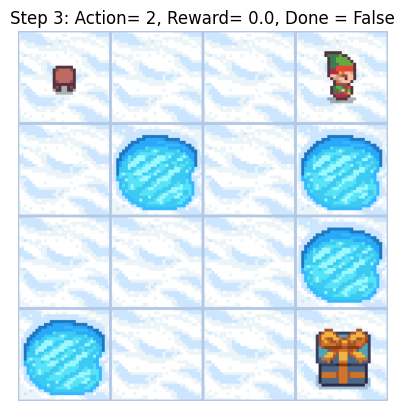

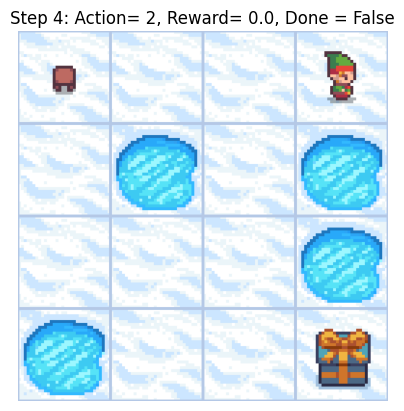

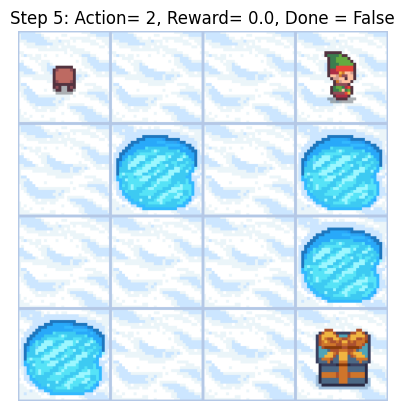

In [58]:
#same code but for non-slippery  : always go right
env_non_slippery = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')
obs, info = env_non_slippery.reset()
for i in range(5):
    action = 2
    obs, reward, done, truncated, info = env_non_slippery.step(action)
    frame = env_non_slippery.render()
    plt.imshow(frame)
    plt.title(f'Step {i+1}: Action= {action}, Reward= {reward}, Done = {done}')
    plt.axis('off')
    plt.show()
    #truncated is like when we move too far from the ziel and there is no use of going further 
    if done or truncated:
        print(' Episode ended.')
        break


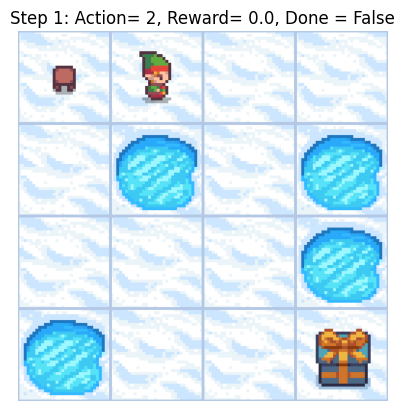

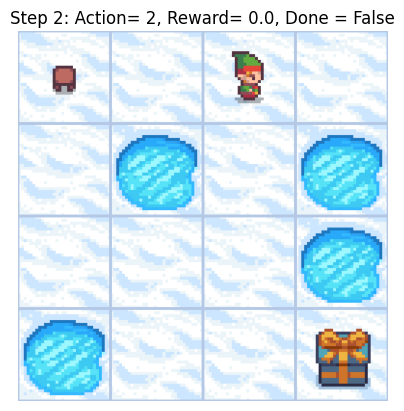

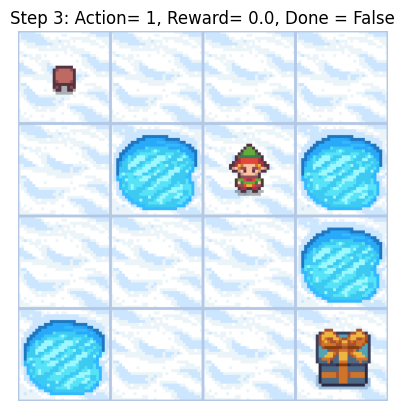

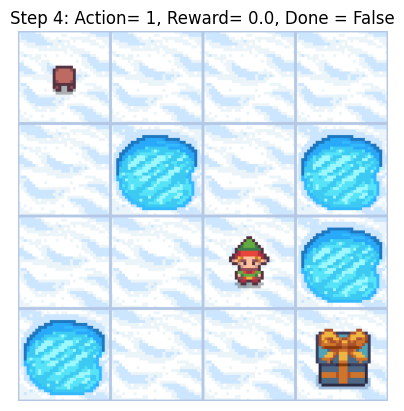

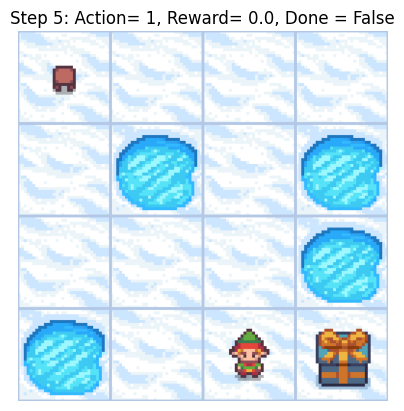

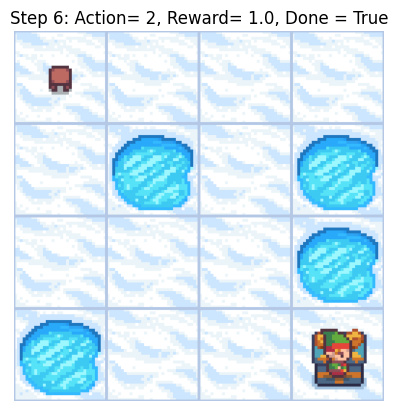

Episode ended.


In [59]:
#sequence of actions for the non-slippery 
obs, info = env_non_slippery.reset()
def action_step(action: int, step_num: int):
    action = action
    obs, reward, done, truncated, info = env_non_slippery.step(action)
    frame = env_non_slippery.render()
    plt.imshow(frame)
    plt.title(f'Step {i+1}: Action= {action}, Reward= {reward}, Done = {done}')
    plt.axis('off')
    plt.show()
    #truncated is like when we move too far from the ziel and there is no use of going further 
    return done or truncated


actions = [2, 2, 1, 1, 1, 2]
for i, action in enumerate(actions):
    if action_step(action, i):
        print('Episode ended.')
        break



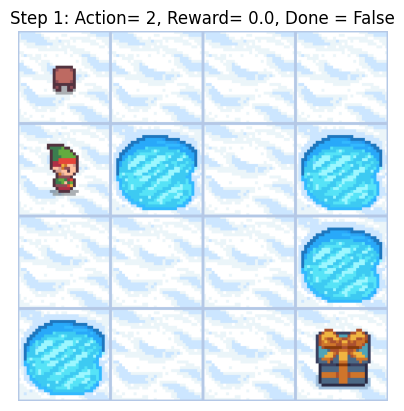

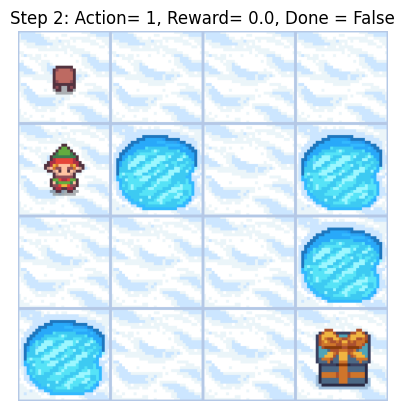

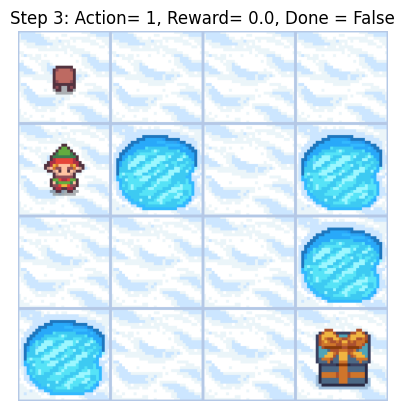

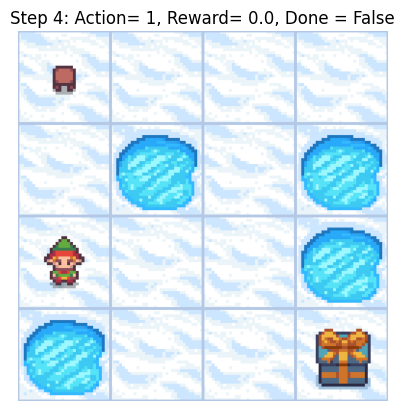

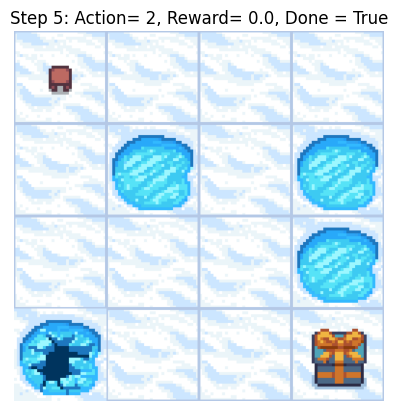

 Episode ended.


In [65]:
#key is observation and the value is the optimal action we decide to take 

actions = {0: 2, 1: 2, 2: 1, 3: 0, 4: 1, 5: None, 6: 1, 7: None, 8: 2, 9: 2, 10: 1, 11: None, 12: None, 13: 2, 14: 2, 15:None}
#non-slippery with a dictionary of actions
#env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')
#slippery with a dictionary 
env = gym.make('FrozenLake-v1', is_slippery=True, render_mode='rgb_array')
obs, info = env.reset()
for i in range(50):
    action = actions[obs]
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    plt.imshow(frame)
    plt.title(f'Step {i+1}: Action= {action}, Reward= {reward}, Done = {done}')
    plt.axis('off')
    plt.show()
    #truncated is like when we move too far from the ziel and there is no use of going further 
    if done or truncated:
        print(' Episode ended.')
        break

          
          
        
          
          